![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import Pipeline
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/train_set.csv")

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [140]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [193]:
df.corr()

,0,1,3,5,9,10,11,14,16
0,1.000000,-0.044017,-0.012569,0.044390,0.012169,-0.005268,0.065421,-0.000304,-0.043202
1,-0.044017,1.000000,0.128066,-0.060985,-0.010892,0.002042,-0.019272,-0.028417,0.049095
3,-0.012569,0.128066,1.000000,-0.043746,-0.048573,-0.004483,-0.027284,0.021327,-0.033820
5,0.044390,-0.060985,-0.043746,1.000000,-0.118375,0.005043,-0.010412,0.091744,-0.141999
9,0.012169,-0.010892,-0.048573,-0.118375,1.000000,0.005770,-0.010966,0.093038,0.071130
10,-0.005268,0.002042,-0.004483,0.005043,0.005770,1.000000,0.006760,0.007707,-0.001891
11,0.065421,-0.019272,-0.027284,-0.010412,-0.010966,0.006760,1.000000,-0.008242,0.025461
14,-0.000304,-0.028417,0.021327,0.091744,0.093038,0.007707,-0.008242,1.000000,-0.152946
16,-0.043202,0.049095,-0.033820,-0.141999,0.071130,-0.001891,0.025461,-0.152946,1.000000


In [182]:

class MultiColumnLabelEncoder:
       def __init__(self,columns = None):
           self.columns = columns # array of column names to encode

       def fit(self,X,y=None):
           return self # not relevant here

       def transform(self,X):
           '''
           Transforms columns of X specified in self.columns using
           LabelEncoder(). If no columns specified, transforms all
           columns in X.
           '''
           output = X.copy()
           if self.columns is not None:
               for col in self.columns:
                   output[col] = LabelEncoder().fit_transform(output[col])
           else:
               for colname,col in output.iteritems():
                   output[colname] = LabelEncoder().fit_transform(col)
           return output

       def fit_transform(self,X,y=None):
           return self.fit(X,y).transform(X)

In [190]:
# Transformamos el datafrema df para las columnas que sean string los convierta a números:
encoding_pipeline = Pipeline([
       ('encoding',MultiColumnLabelEncoder(columns=['2','4','6','7','8','12','13','15','17']))
       # add more pipeline steps as needed
])
df_transformacion = encoding_pipeline.fit_transform(df)
df_transformacion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,0,6,0,2,2,2,5,4.0,45810,2.0,2,2,2,2,2817.0,0
1,159472,23,0,6,0,4,2,1,5,2.0,128565,15.0,1,2,4,5,4498.0,2
2,309765,2,2,5,2,2,1,3,5,3.0,46565,5.0,2,2,2,7,4573.0,1
3,279614,32,5,9,1,3,2,3,1,4.0,124546,6.0,0,2,4,1,7202.0,5
4,147791,14,0,1,0,3,2,3,4,2.0,22729,8.0,2,2,2,5,3398.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,0,9,1,3,2,2,1,3.0,82914,3.0,0,2,6,5,3966.0,10
99996,254763,28,1,11,0,2,2,2,5,2.0,40026,5.0,2,2,3,2,4005.0,5
99997,69788,6,0,6,0,3,2,1,5,3.0,92346,2.0,1,1,2,3,5215.0,3
99998,204442,32,5,9,1,2,2,3,1,4.0,113798,15.0,1,2,3,4,5092.0,1


In [184]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender
df_transformacion.drop("0",1,inplace = True)

In [185]:
# Convierto todos los nan en 0
df_transformacion.fillna(0, inplace=True)

In [186]:
# Calculamos la matriz de correlación
df_transformacion.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,1.000000,0.035173,0.128066,-0.136791,-0.060985,0.003113,0.160607,-0.130029,-0.009466,0.002042,-0.017554,-0.014986,-0.009927,-0.028417,0.018930,0.049095,0.041750
2,0.035173,1.000000,-0.009057,0.267253,-0.100789,-0.001518,0.240480,-0.261211,0.017200,-0.005673,0.056770,0.081733,-0.006573,-0.046848,0.008463,0.020694,0.058781
3,0.128066,-0.009057,1.000000,0.003617,-0.043746,0.025421,0.120336,-0.093437,-0.048851,-0.004483,-0.022933,-0.011756,0.002567,0.021327,0.022547,-0.033820,0.008060
4,-0.136791,0.267253,0.003617,1.000000,-0.008004,0.038262,0.076576,-0.507192,-0.046829,-0.002893,0.153165,0.004409,-0.008788,-0.022010,-0.018352,0.075423,0.011989
5,-0.060985,-0.100789,-0.043746,-0.008004,1.000000,0.048221,-0.432210,0.050064,-0.118681,0.005043,-0.011819,-0.019724,0.013587,0.091744,-0.140317,-0.141999,-0.122707
6,0.003113,-0.001518,0.025421,0.038262,0.048221,1.000000,-0.003343,-0.039449,-0.098245,0.003809,0.017898,-0.082302,-0.003973,0.025482,0.035652,-0.080486,0.033860
7,0.160607,0.240480,0.120336,0.076576,-0.432210,-0.003343,1.000000,-0.151632,-0.016462,-0.003305,0.018406,0.013632,0.002412,-0.093646,0.031934,0.045787,0.187927
8,-0.130029,-0.261211,-0.093437,-0.507192,0.050064,-0.039449,-0.151632,1.000000,0.077108,0.001780,-0.141658,0.041169,0.013443,0.022007,0.001289,-0.020504,-0.005414
9,-0.009466,0.017200,-0.048851,-0.046829,-0.118681,-0.098245,-0.016462,0.077108,1.000000,0.005968,-0.015789,0.131498,0.048222,0.093004,0.001609,0.071154,0.029290
10,0.002042,-0.005673,-0.004483,-0.002893,0.005043,0.003809,-0.003305,0.001780,0.005968,1.000000,0.006579,0.004400,0.000164,0.007707,0.001132,-0.001891,0.002740


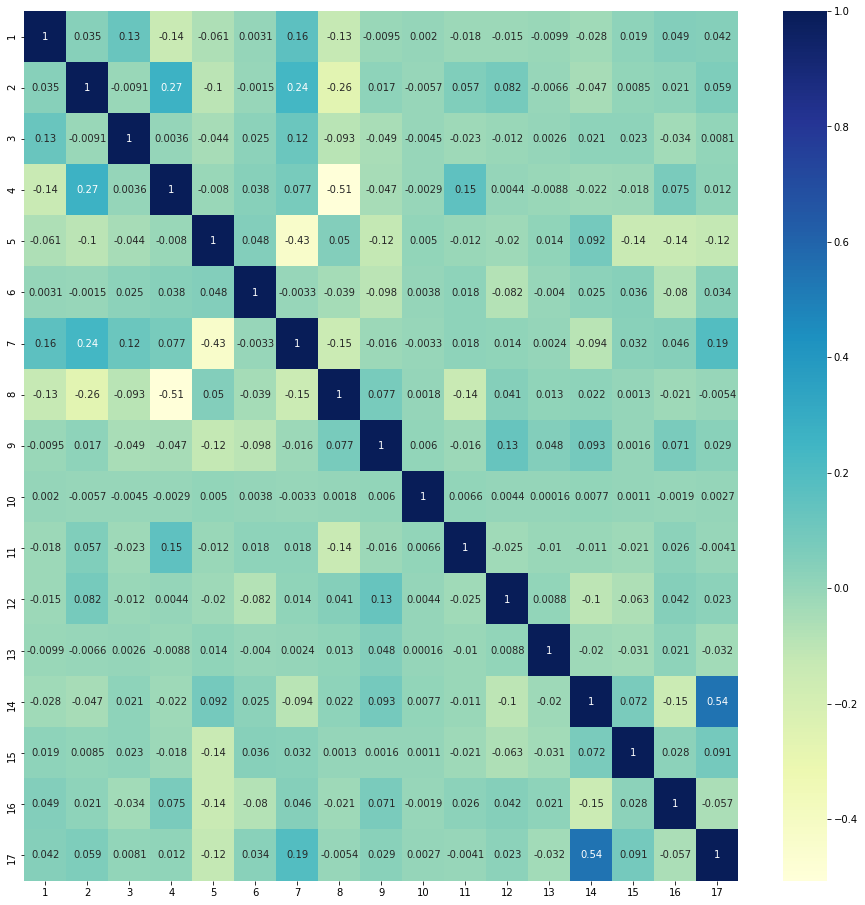

In [155]:
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df_trans.corr(), annot = True, cmap="YlGnBu")

In [159]:
# PROBLEMA DE CLASIFICACIÓN Hemos cambiado a clases por números
df_transformacion["17"].value_counts()

2     27452
1     24476
3     17311
5     10984
0      7427
4      3668
7      3297
10     2150
8      1470
9       908
6       857
Name: 17, dtype: int64

In [158]:
type(df['1'][1])

numpy.int64

In [92]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí ________
df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

#### 1. Definir X e y

In [160]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df_transformacion[['1','5', '6', '7','9','15','16']])
y = np.array(df_transformacion['17'])
X.shape

(100000, 7)

In [161]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [163]:
X_train

array([[2.500e+01, 4.000e+00, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        3.157e+03],
       [1.000e+01, 4.000e+00, 2.000e+00, ..., 3.000e+00, 7.000e+00,
        5.768e+03],
       [2.900e+01, 4.000e+00, 2.000e+00, ..., 4.000e+00, 3.000e+00,
        5.151e+03],
       ...,
       [9.000e+00, 4.000e+00, 2.000e+00, ..., 2.000e+00, 5.000e+00,
        3.648e+03],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 4.000e+00, 5.000e+00,
        4.234e+03],
       [2.800e+01, 2.000e+00, 2.000e+00, ..., 3.000e+00, 6.000e+00,
        4.694e+03]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [ ]:
#################
XGBoost

In [205]:
from xgboost import XGBClassifier 
## modelo XGBoost
model = XGBClassifier() 
model.fit(X_train, y_train) 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Make predictions for test data 
y_pred = model.predict(X_test)
y_pred.shape

In [ ]:
model.score(X_test, y_test)

In [ ]:
##################

In [117]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [164]:
model.fit(X_train, y_train)

LogisticRegression()

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [165]:
predictions = model.predict(X_test)
print(predictions)

[2 2 2 ... 2 2 2]


#### 6. Sacar métricas, valorar el modelo 

In [166]:
model.score(X_test,y_test)

0.27955

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [167]:
to_pred = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/test_set.csv")

In [168]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [170]:
encoding_pipeline2 = Pipeline([
       ('encoding',MultiColumnLabelEncoder(columns=['2','4','6','7','8','12','13','15']))
       # add more pipeline steps as needed
])
to_pred_transformacion = encoding_pipeline2.fit_transform(to_pred)

In [ ]:
##########

In [171]:
to_pred_transformacion.drop("0",1,inplace = True)

In [173]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred_transformacion = to_pred_transformacion.fillna(0)

In [174]:
to_pred_transformacion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,0,7,1,4,2,3,2,2.0,59278,8.0,0,1,2,4,4778.0
1,208989,15,2,5,2,3,2,3,5,2.0,102253,15.0,1,2,3,3,5734.0
2,305872,17,4,1,0,4,2,2,4,4.0,5828,4.0,0,1,3,7,5064.0
3,266099,3,2,3,2,4,0,2,0,2.0,56642,9.0,2,0,4,3,3254.0
4,13228,6,0,6,0,4,2,2,5,1.0,116266,8.0,0,1,3,2,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,3,13,1,6,1,1,1,3.0,123269,25.0,2,1,4,5,5089.0
133740,144850,27,0,7,1,2,2,3,2,2.0,1293,8.0,0,2,3,6,6713.0
133741,180676,16,2,3,2,3,2,2,0,3.0,112921,5.0,1,1,3,3,5326.0
133742,39933,28,1,11,0,4,2,2,5,2.0,585,2.0,1,0,2,3,7072.0


In [175]:
predictions_submit = model.predict(df_trans2[['1','5', '6', '7','9','15','16']])
predictions_submit 

array([2, 2, 2, ..., 2, 2, 2])

In [176]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,2
1,208989,2
2,305872,2
3,266099,2
4,13228,2
...,...,...
133739,318155,2
133740,144850,2
133741,180676,2
133742,39933,2


In [177]:
sample = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/sample_submission.csv")

In [178]:
sample.shape

(133744, 2)

In [179]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
